In [1]:
from src.data_preprocessor import DataProcessor
from data_configs.configs import *
from models.neural_networks import *
from src.cross_validation import CrossValidation
import numpy as np

config = forest_fires_config
data_processor = DataProcessor(config=config)
cross_validator = CrossValidation(config=config)

In [2]:
raw_data = data_processor.load_data()
data_1 = data_processor.impute_missing_values(raw_data)
data_2 = data_processor.encode_nominal_features(data_1)
data_3 = data_processor.encode_ordinal_features(data_2)
data_4 = data_processor.standardize_data(data_3,data_3,features=['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain'])
data_5 = data_processor.log_transform(data_4)

c:\Users\Srikanta\Documents\Intro to Machine Learning\programming_assignment_1\src\data_preprocessor.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mean(), inplace=True)


In [3]:
data_5

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,1.007337,0.569309,-1.966538,0.357375,-0.805180,-1.322045,-1.828706,-0.860113,-1.840857,0.411326,1.497164,-0.073197,0.000000
1,1.007337,-0.243765,1.109046,-1.089853,-0.008094,-1.178399,0.488418,-0.509195,-0.153130,-0.691786,-1.740070,-0.073197,0.000000
2,1.007337,-0.243765,1.109046,0.839784,-0.008094,-1.048806,0.560173,-0.509195,-0.738668,-0.691786,-1.516813,-0.073197,0.000000
3,1.439531,1.382383,-1.966538,0.357375,0.191177,-1.211188,-1.896429,-0.004751,-1.823636,3.230391,-0.009824,0.602572,0.000000
4,1.439531,1.382383,-1.966538,1.322193,-0.243597,-0.930142,-1.796859,0.126843,-1.289763,3.352959,-1.237741,-0.073197,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-0.289244,-1.056839,0.230308,1.322193,-1.638496,-0.845829,0.474309,-1.561947,1.534597,-0.753070,-0.735411,-0.073197,2.006871
513,-1.153631,-0.243765,0.230308,1.322193,-1.638496,-0.845829,0.474309,-1.561947,0.518517,1.637006,0.994835,-0.073197,4.012592
514,1.007337,-0.243765,0.230308,1.322193,-1.638496,-0.845829,0.474309,-1.561947,0.397965,1.575722,1.497164,-0.073197,2.498152
515,-1.585825,-0.243765,0.230308,0.839784,0.680298,0.548471,0.269122,0.499693,1.155720,-0.140230,-0.009824,-0.073197,0.000000


In [4]:
data_train, data_val = cross_validator.random_partition(data_4, random_state=42)

In [5]:
data = data_train.to_numpy()
X_train = data[:,:-1]
y_train = data[:,-1:]

In [6]:
data_test = data_val.to_numpy()
X_val = data_test[:,:-1]
y_val = data_test[:,-1:]

In [7]:
y_val[0]

array([0.])

In [8]:
autoE = AutoEncoder(config,n_input=X_train.shape[1],n_encoder=4)

autoE.train(X_train, max_epochs=30000, lr=0.0001)

Epoch 0/30000, Loss: 1.0098742746852267
Epoch 1/30000, Loss: 1.0098032938938575
Epoch 2/30000, Loss: 1.0097431231979765
Epoch 3/30000, Loss: 1.0096920083231304
Epoch 4/30000, Loss: 1.0096484759083726
Epoch 5/30000, Loss: 1.0096112882544754
Epoch 6/30000, Loss: 1.0095794053599807
Epoch 7/30000, Loss: 1.0095519530684993
Epoch 8/30000, Loss: 1.0095281963411729
Epoch 9/30000, Loss: 1.009507516827696
Epoch 10/30000, Loss: 1.0094893940428933
Epoch 11/30000, Loss: 1.0094733895677475
Epoch 12/30000, Loss: 1.0094591337875698
Epoch 13/30000, Loss: 1.0094463147585955
Epoch 14/30000, Loss: 1.0094346688601787
Epoch 15/30000, Loss: 1.009423972945002
Epoch 16/30000, Loss: 1.0094140377460477
Epoch 17/30000, Loss: 1.0094047023378963
Epoch 18/30000, Loss: 1.0093958294825314
Epoch 19/30000, Loss: 1.009387301717118
Epoch 20/30000, Loss: 1.0093790180641715
Epoch 21/30000, Loss: 1.0093708912637418
Epoch 22/30000, Loss: 1.0093628454433718
Epoch 23/30000, Loss: 1.009354814155125
Epoch 24/30000, Loss: 1.009346

In [9]:
ffn = FeedForwardNetwork(config,n_input=X_train.shape[1],n_hidden_1=20,n_hidden_2=50,n_output=1)

MSEs, val_metrics, final_mse = ffn.train(X_train,y_train,X_val,y_val,5000,0.000001)

Epoch 0/5000, Train MSE: 2203.471142002306, Val MSE: 12174.027133258212
Epoch 100/5000, Train MSE: 2193.630235382024, Val MSE: 12156.49018710814
Epoch 200/5000, Train MSE: 2184.548266728519, Val MSE: 12140.005835214646
Epoch 300/5000, Train MSE: 2176.136585299595, Val MSE: 12124.447993481353
Epoch 400/5000, Train MSE: 2168.28779549566, Val MSE: 12109.647490755104
Epoch 500/5000, Train MSE: 2160.853404958739, Val MSE: 12095.34469891608
Epoch 600/5000, Train MSE: 2153.6064897753336, Val MSE: 12081.107091124906
Epoch 700/5000, Train MSE: 2146.1787203442723, Val MSE: 12066.185285030839
Epoch 800/5000, Train MSE: 2137.9466432639015, Val MSE: 12049.248566010314
Epoch 900/5000, Train MSE: 2127.7688863088897, Val MSE: 12027.786781345498
Epoch 1000/5000, Train MSE: 2113.261382553458, Val MSE: 11996.40327986495
Epoch 1100/5000, Train MSE: 2090.938805431367, Val MSE: 11945.138654486762
Epoch 1200/5000, Train MSE: 2067.0786026884143, Val MSE: 11879.464578442923
Epoch 1300/5000, Train MSE: 2053.673

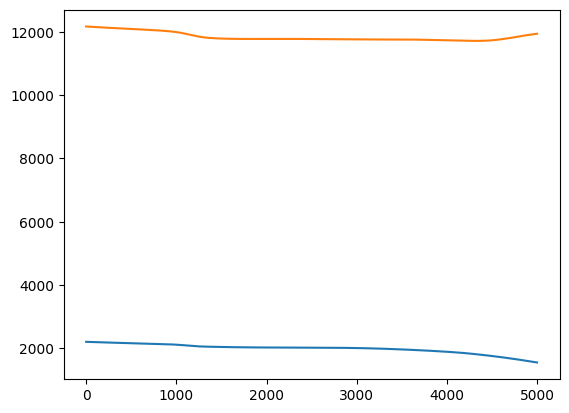

In [10]:
import matplotlib.pyplot as plt

plt.plot(MSEs)
plt.plot(val_metrics)

In [11]:
linear = LinearNetwork(config)

losses = linear.linear_regression(X_train,y_train,X_val,y_val)

Epoch 0/1000, Training MSE: 2203.15807517869, Validation MSE: 12158.701061904001
Epoch 100/1000, Training MSE: 2016.0383975554626, Validation MSE: 11787.925962786258
Epoch 200/1000, Training MSE: 2009.2308538135162, Validation MSE: 11760.586496164187
Epoch 300/1000, Training MSE: 2007.5170033992765, Validation MSE: 11758.039755897946
Epoch 400/1000, Training MSE: 2006.56272948862, Validation MSE: 11758.015354937124
Epoch 500/1000, Training MSE: 2005.91331747644, Validation MSE: 11758.074099991181
Epoch 600/1000, Training MSE: 2005.4459308083078, Validation MSE: 11758.055844078153
Epoch 700/1000, Training MSE: 2005.1037740926542, Validation MSE: 11758.001657960433
Epoch 800/1000, Training MSE: 2004.8517723770456, Validation MSE: 11757.939138755235
Epoch 900/1000, Training MSE: 2004.665684090469, Validation MSE: 11757.879412955603


In [12]:
_,_,output = ffn.forward_pass(X_val)

In [13]:
output

array([[  7.31503096],
       [  2.53346095],
       [ 35.49630401],
       [ -8.1122959 ],
       [ -4.53994819],
       [  3.10489108],
       [ 19.03877523],
       [  3.87509354],
       [ -9.56725159],
       [  7.23473181],
       [ 14.57412629],
       [  6.25157793],
       [ 20.48933287],
       [  1.53636391],
       [ 22.16961446],
       [ -1.60862651],
       [ 29.68438299],
       [ -7.11336055],
       [ 37.10114756],
       [ -3.33687761],
       [  4.46783565],
       [ -7.53815668],
       [ 11.17113595],
       [ 20.76098295],
       [-15.55645351],
       [ 34.18829901],
       [  5.58387082],
       [ 26.4680897 ],
       [  6.52088103],
       [  2.76378279],
       [  0.3748015 ],
       [ 20.50942931],
       [ 12.92641429],
       [ 28.09362868],
       [  6.49913035],
       [ -2.49183344],
       [  2.81973212],
       [  9.64956611],
       [ 24.93492137],
       [  4.70369955],
       [ 32.33679324],
       [  7.60295562],
       [ -4.14875511],
       [  5

In [14]:
MSE = np.mean((y_val-output)**2)

In [15]:
MSE

11718.082031958185

In [16]:
np.min(val_metrics)

11718.082031958185